In [1]:
from scipy.interpolate import interp1d
import sys
from parse import *
import yaml
import numpy as np
#import cmath
#import glob
from sympy import * 
from getData import *
import fnmatch
import os
import io
from opticalglass import util
import matplotlib.pyplot as plt

In [2]:
from opticalglass import rindexinfo

In [3]:
import requests

# Get a list of all the Yaml files under the database root

In [4]:
db_root = '/Users/Mike/Developer/PyProjects/refractiveindexinfo/database'

In [5]:
os.getcwd()

'/Users/Mike/Developer/PyProjects/opticalglass/notebooks'

In [6]:
os.chdir(db_root)

In [7]:
log = []

# Redirect stderr
class writer(io.TextIOBase):
    def write(self, data):
        log.append(data)
        return len(data)

sys.stderr = writer()

In [8]:
files = []
for root, dirnames, filenames in os.walk(db_root):
    for filename in fnmatch.filter(filenames, '*.yml'):
        files.append(os.path.join(root, filename))

In [9]:
len(files)

2827

In [10]:
files[11]

'/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/(C16H14O3)n - polycarbonate/Zhang.yml'

# Survey the Yaml file directory tree

In [11]:
top_level_keys = util.Counter()
data_list_len = util.Counter()
data_types = util.Counter()
data_data_keys = util.Counter()
data_data_keys_dict = dict()
data_type_keys = util.Counter()
data_type_keys_dict = dict()
data_specs_keys = util.Counter()

In [12]:
num_exceptions = 0
for i, file in enumerate(files):
    try:
        yamlStream=open(file,'r')
        allData=yaml.safe_load(yamlStream)
        for k in allData.keys():
            top_level_keys[k] += 1
        num_ds = len(allData['DATA'])
        allDataData = allData['DATA']
        data_list_len[num_ds] += 1
        for ds in allDataData:
            data_type_keys[ds['type']] += 1
            if not ds['type'] in data_data_keys_dict:
                data_data_keys_dict[ds['type']] = [i]
            else:
                data_data_keys_dict[ds['type']].append(i)
            for k in ds.keys():
                data_data_keys[k] += 1
        if num_ds == 1:
            data_type_key = allDataData[0]['type']
        else:
            data_type_key = (allDataData[0]['type'], allDataData[1]['type'])
        data_types[data_type_key] += 1
        if not data_type_key in data_type_keys_dict:
            data_type_keys_dict[data_type_key] = [i]
        else:
            data_type_keys_dict[data_type_key].append(i)
        allDataSpecs = allData['SPECS']
        for k in allDataSpecs.keys():
            data_specs_keys[k] += 1
    except:
        num_exceptions += 1
        pass

In [13]:
top_level_keys

{'REFERENCES': 2826, 'COMMENTS': 2222, 'DATA': 2826, 'SPECS': 2024}

In [14]:
data_list_len

{1: 1226, 2: 1600}

In [15]:
data_data_keys

{'type': 4426, 'wavelength_range': 2016, 'coefficients': 2016, 'data': 2410}

In [16]:
data_type_keys

{'formula 5': 102,
 'formula 2': 515,
 'tabulated nk': 613,
 'formula 3': 1169,
 'tabulated n': 189,
 'tabulated k': 1608,
 'formula 1': 117,
 'formula 4': 86,
 'formula 9': 1,
 'formula 6': 22,
 'formula 8': 3,
 'formula 7': 1}

In [17]:
def print_data_type_keys(key, skip=20):
    print(f"{key}: {data_type_keys[key]}")
    for i in data_data_keys_dict[key][::skip]:
        print(f"{i}: {files[i]}")

In [18]:
print_data_type_keys('tabulated n', 20)

tabulated n: 189
20: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C3H8O2 - propylene glycol/Otanicar.yml
350: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/lzos/CTK12.yml
370: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/lzos/LF7.yml
390: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/lzos/KF7.yml
1157: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/barberini/D6625.yml
2039: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/GaN/Lin-wurtzite.yml
2452: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Si/Li-293K.yml
2513: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Kr/Sinnock-liquid-115.95K.yml
2563: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Ar/Sinnock-liquid-86K.yml
2784: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Xe/Sinnoc

In [19]:
print_data_type_keys('tabulated nk', 50)

tabulated nk: 613
9: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/(C2H4)n - polyethylene/Smith.yml
130: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/(C8H8)n - polystyren/Zhang.yml
204: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/other/semiconductor alloys/AlAs-GaAs/Adachi-0.315.yml
304: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/other/alloys/Au-Ag/Rioux-Au40Ag60.yml
2044: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Pd/Werner-DFT.yml
2133: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Mo/Werner-DFT.yml
2199: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/AlSb/Djurisic.yml
2298: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/ZnO/Querry.yml
2381: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Zr/Querry.yml
2491: /Users/Mike/Developer/PyProjects/refractivein

In [20]:
print_data_type_keys('tabulated n', 20)

tabulated n: 189
20: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C3H8O2 - propylene glycol/Otanicar.yml
350: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/lzos/CTK12.yml
370: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/lzos/LF7.yml
390: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/lzos/KF7.yml
1157: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/barberini/D6625.yml
2039: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/GaN/Lin-wurtzite.yml
2452: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Si/Li-293K.yml
2513: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Kr/Sinnock-liquid-115.95K.yml
2563: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Ar/Sinnock-liquid-86K.yml
2784: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Xe/Sinnoc

In [21]:
def print_data_types(key, skip=20):
    print(f"{key}: {data_types[key]}")
    for i in data_type_keys_dict[key][::skip]:
        print(f"{i}: {files[i]}")

In [22]:
data_types

{'formula 5': 85,
 'formula 2': 103,
 'tabulated nk': 612,
 'formula 3': 15,
 ('tabulated n', 'tabulated k'): 10,
 ('formula 2', 'tabulated k'): 412,
 'tabulated n': 179,
 ('formula 5', 'tabulated nk'): 1,
 'formula 1': 111,
 'formula 4': 85,
 'tabulated k': 9,
 'formula 9': 1,
 ('formula 5', 'tabulated k'): 16,
 'formula 6': 22,
 ('formula 1', 'tabulated k'): 6,
 ('formula 3', 'tabulated k'): 1154,
 'formula 8': 3,
 ('formula 4', 'tabulated k'): 1,
 'formula 7': 1}

In [23]:
print_data_types('tabulated nk', 60)

tabulated nk: 612
9: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/(C2H4)n - polyethylene/Smith.yml
160: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/other/perovskite/CH3NH3PbI3/Ball.yml
275: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/other/clays/montmorillonite/Querry.yml
1147: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/nsg/Pilkington-Optiwhite.yml
2119: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/WSe2/Hsu-3L.yml
2203: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/ZnTe/Sato.yml
2318: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/GaAs/Ozaki.yml
2438: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/SiO2/Kischkat.yml
2586: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Au/Yakubovsky-9nm.yml
2702: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/

In [24]:
print_data_types(('tabulated n', 'tabulated k'), 2)

('tabulated n', 'tabulated k'): 10
20: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C3H8O2 - propylene glycol/Otanicar.yml
239: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/other/mixed organic/PEDOT-PSS/Chen.yml
322: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/other/commercial plastics/Surlyn A-1601/Smith.yml
2355: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/MoS2/Yim-20nm.yml
2369: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/MoS2/Yim-2nm.yml


In [25]:
print_data_types('formula 2', 10)

formula 2: 103
4: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C6H12 - cyclohexane/Kozma.yml
137: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C2H6OS - dimethyl sulfoxide/Kozma.yml
2013: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/H2O/Daimon-24.0C.yml
2102: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/ZnSe/Marple.yml
2273: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/BaB2O4/Tamosauskas-e.yml
2291: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Te/Caldwell-o.yml
2377: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/PbTiO3/Singh-e.yml
2403: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/ZnGeP2/Boyd-70-o.yml
2522: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/ThF4/Heitmann.yml
2654: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/ma

In [26]:
print_data_types(('formula 2', 'tabulated k'), 40)

('formula 2', 'tabulated k'): 412
31: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C7H8 - toluene/Kedenburg.yml
998: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/schott/LAFN7.yml
1038: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/schott/N-SK2.yml
1078: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/schott/BAFN6.yml
1118: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/schott/P-LAF37.yml
1443: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/ohara/S-LAM3.yml
1529: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/ohara/PBL6Y.yml
1601: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/ohara/S-TIL27.yml
1671: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/ohara/S-LAH65V.yml
1739: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/ohara/PB

In [27]:
print_data_types('formula 3', 3)

formula 3: 15
16: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C2H3N - acetonitrile/Moutzouris.yml
53: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C4H8O2 - dioxane/Moutzouris.yml
87: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C5H12O - pentanol/Moutzouris-normal.yml
108: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/CCl4 - carbon tetrachloride/Moutzouris.yml
140: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C4H10O - butanol/Moutzouris-n.yml


In [28]:
print_data_types(('formula 3', 'tabulated k'), 100)

('formula 3', 'tabulated k'): 1154
412: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/hoya/NBFD15-W.yml
512: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/hoya/NBFD12.yml
612: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/hikari/J-LASFH24.yml
712: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/hikari/J-BK7.yml
812: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/hikari/SK4.yml
912: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/hikari/SF15.yml
1224: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/cdgm/QF50.yml
1324: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/cdgm/QF5.yml
1433: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/ohara/PBL6.yml
1646: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/ohara/BPH50.yml
1852: /Users/Mike/De

In [29]:
print_data_types('tabulated n', 20)

tabulated n: 179
36: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/CHBr3 - bromoform/Ghosal.yml
355: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/lzos/TF8.yml
375: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/lzos/F1.yml
395: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/lzos/KF6.yml
1162: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/glass/barberini/D0391.yml
2099: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/BP/Wettling.yml
2475: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Si/Li-700K.yml
2538: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Ge/Li-450K.yml
2629: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/CS2/Ghosal.yml


In [30]:
print_data_types('formula 1', 10)

formula 1: 111
47: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/(C2H4O)n - polyvinyl alcohol/Bodurov.yml
2021: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/H2O/Kofman-70K.yml
2042: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/GaN/Barker-e.yml
2147: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/LiI/Li.yml
2234: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/MgF2/Li-e.yml
2307: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/TiO2/Bodurov.yml
2430: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/SiO2/Radhakrishnan-o.yml
2555: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/KI/Li.yml
2642: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/KF/Li.yml
2739: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/KCl/Li.yml
2798: /Users/Mike/Developer/P

In [31]:
print_data_types('formula 4', 5)

formula 4: 85
48: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C8H5KO4 - potassium hydrogen phthalate/Moutzouris-gamma.yml
156: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/other/doped crystals/Nb-RbTiOPO4/Carvajal-beta.yml
2076: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/NH4H2PO4/Zernike-e.yml
2108: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Pb5Ge3O11/Simon-o.yml
2173: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/KNbO3/Umemura-alpha.yml
2232: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Y3Al5O12/Hrabovsky.yml
2275: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/BaB2O4/Zhang-o.yml
2302: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/ZnO/Bond-e.yml
2342: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Ag3AsS3/Hulme-e.yml
2386: /Users/Mike/Developer/PyPr

In [32]:
print_data_types('formula 5', 10)

formula 5: 85
1: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C2H4O2 - acetic acid/El-Kashef.yml
25: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/CH4O - methanol/Kozma.yml
60: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C3H8O3 - glycerol/Rheims.yml
86: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C9H8O - cinnamaldehyde/Rheims.yml
138: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/C4H10O - butanol/El-Kashef.yml
229: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/other/silk/Bombyx mori/Bucciarelli-FPP_FA_Ex.yml
260: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/other/liquid crystals/MLC-6608/Li-o.yml
270: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/other/liquid crystals/5CB/Li-o.yml
344: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/other/resists/Microchem 

In [33]:
print_data_types('formula 6', 5)

formula 6: 22
246: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/other/mixed gases/air/Ciddor.yml
2221: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/O2/Zhang.yml
2567: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Ar/Peck-15C.yml
2652: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/N2/Griesmann.yml
2778: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Xe/Bideau-Mehu.yml


In [34]:
print_data_types('formula 7', 10)

formula 7: 1
2467: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/Si/Edwards.yml


In [35]:
print_data_types('formula 8', 1)

formula 8: 3
2114: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/TlCl/Schroter.yml
2174: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/AgBr/Schroter.yml
2200: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/main/TlBr/Schroter.yml


In [36]:
print_data_types('formula 9', 10)

formula 9: 1
134: /Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data/organic/CH4N2O - urea/Rosker-e.yml


In [37]:
data_specs_keys

{'n_absolute': 1895,
 'temperature': 1775,
 'pressure': 45,
 'wavelength_vacuum': 1884,
 'substrate': 98,
 'film_thickness': 78,
 'x': 8,
 'thickness': 8,
 'thermal_dispersion': 1235,
 'nd': 1548,
 'Vd': 1548,
 'glass_code': 1243,
 'glass_status': 830,
 'density': 1494,
 'thermal_expansion': 1493,
 'climatic_resistance': 931,
 'stain_resistance': 336,
 'acid_resistance': 844,
 'dPgF': 1465,
 'phosphate_resistance': 618,
 'alkali_resistance': 166,
 'specific_heat': 5,
 'thermal_conductivity': 5,
 'transition_temperature': 7,
 'Knoop_hardness': 6,
 'fracture_toughness': 5,
 'shear_modulus': 2,
 'Youngs_modulus': 7,
 'Vickers_hardness': 1,
 'direction': 1,
 'deposition_temperature': 7}

# Investigate library yaml file

In [38]:
lib_root = '/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/library.yml'

In [39]:
yamlStream = open(lib_root,'r')
shelves = yaml.safe_load(yamlStream)

In [40]:
for shelf in shelves:
    print(f"{shelf['SHELF']}: {shelf['name']}")

main: MAIN - simple inorganic materials
organic: ORGANIC - organic materials
glass: GLASS - glasses
other: OTHER - miscellaneous materials
3d: 3D - selected data for 3D artists


In [41]:
shelves[1].keys()

dict_keys(['SHELF', 'name', 'content'])

In [42]:
shelves[1]['SHELF']

'organic'

In [43]:
shelves[1]['name']

'ORGANIC - organic materials'

In [62]:
shelves[0]['content']

[{'DIVIDER': 'Ag - Silver'},
 {'BOOK': 'Ag',
  'name': 'Ag (Silver)',
  'info': 'main/Ag.html',
  'content': [{'DIVIDER': 'Experimental data: bulk, thick film'},
   {'PAGE': 'Johnson',
    'name': 'Johnson and Christy 1972: n,k 0.188-1.94 µm',
    'data': 'main/Ag/Johnson.yml'},
   {'PAGE': 'Choi',
    'name': 'Choi et al. 2020: n,k 1.23-6.99 µm',
    'data': 'main/Ag/Choi.yml'},
   {'PAGE': 'Jiang',
    'name': 'Jiang et al. 2016: n,k 0.300-2.000 µm',
    'data': 'main/Ag/Jiang.yml'},
   {'PAGE': 'Yang',
    'name': 'Yang et al. 2015: n,k 0.270-24.9 µm',
    'data': 'main/Ag/Yang.yml'},
   {'PAGE': 'McPeak',
    'name': 'McPeak et al. 2015: n,k 0.3-1.7 µm',
    'data': 'main/Ag/McPeak.yml'},
   {'PAGE': 'Babar',
    'name': 'Babar and Weaver 2015: n,k 0.207-12.4 µm',
    'data': 'main/Ag/Babar.yml'},
   {'PAGE': 'Wu',
    'name': 'Wu et al. 2014: n,k 0.29-1.00 µm',
    'data': 'main/Ag/Wu.yml'},
   {'PAGE': 'Werner',
    'name': 'Werner et al. 2009: n,k 0.0176-2.48 µm',
    'data': 'm

In [44]:
shelves[1]['content']

[{'DIVIDER': 'Alkanes'},
 {'BOOK': 'methane',
  'name': 'CH<sub>4</sub> (Methane)',
  'info': 'organic/methane.html',
  'content': [{'DIVIDER': 'Gas'},
   {'PAGE': 'Rollefson',
    'name': 'Rollefson and Havens 1940: Gas at 0 °C; n 1.68-14.8 µm',
    'data': 'organic/CH4 - methane/Rollefson.yml'},
   {'PAGE': 'Loria',
    'name': 'Loria 1909: Gas at 0 °C; n 0.529-0.659 µm',
    'data': 'organic/CH4 - methane/Loria.yml'},
   {'DIVIDER': 'Liquid'},
   {'PAGE': 'Martonchik-liquid-111K',
    'name': 'Martonchik and Orton 1994: Liquid at 111 K; n,k 0.002-71.4 µm',
    'data': 'organic/CH4 - methane/Martonchik-liquid-111K.yml'},
   {'PAGE': 'Martonchik-liquid-90K',
    'name': 'Martonchik and Orton 1994: Liquid at 90 K; n,k 0.002-71.4 µm',
    'data': 'organic/CH4 - methane/Martonchik-liquid-90K.yml'},
   {'DIVIDER': 'Solid'},
   {'PAGE': 'Martonchik-solid-90K',
    'name': 'Martonchik and Orton 1994: Solid at 90 K; n,k 0.002-100 µm',
    'data': 'organic/CH4 - methane/Martonchik-solid-90K.y

In [61]:
shelves[2]['content']

[{'DIVIDER': 'Popular optical glasses'},
 {'BOOK': 'BK7',
  'name': 'BK7',
  'info': 'glass/BK7.html',
  'content': [{'PAGE': 'SCHOTT',
    'name': 'N-BK7 (SCHOTT)',
    'data': 'glass/schott/N-BK7.yml',
    'info': 'glass/SCHOTT.html'},
   {'PAGE': 'OHARA',
    'name': 'S-BSL7 (OHARA)',
    'data': 'glass/ohara/S-BSL7.yml',
    'info': 'glass/OHARA.html'},
   {'PAGE': 'HIKARI',
    'name': 'J-BK7A (HIKARI)',
    'data': 'glass/hikari/J-BK7A.yml',
    'info': 'glass/HIKARI.html'},
   {'PAGE': 'CDGM',
    'name': 'H-K9L (CDGM)',
    'data': 'glass/cdgm/H-K9L.yml',
    'info': 'glass/CDGM.html'},
   {'PAGE': 'HOYA',
    'name': 'BSC7 (HOYA)',
    'data': 'glass/hoya/BSC7.yml',
    'info': 'glass/HOYA.html'},
   {'PAGE': 'SUMITA',
    'name': 'K-BK7 (SUMITA)',
    'data': 'glass/sumita/K-BK7.yml',
    'info': 'glass/SUMITA.html'},
   {'PAGE': 'LZOS',
    'name': 'K8 (LZOS)',
    'data': 'glass/lzos/K8.yml',
    'info': 'glass/LZOS.html'}]},
 {'BOOK': 'BAF10',
  'name': 'BAF10',
  'info': 

In [45]:
len(shelves[1]['content'])

78

In [46]:
shelves[1]['content'][8]['BOOK']

'acetylene'

In [47]:
shelves[1]['content'][8]['content'][0]

{'PAGE': 'Loria',
 'name': 'Loria 1909: Gas at 0 °C; n 0.529-0.659 µm',
 'data': 'organic/C2H2 - acetylene/Loria.yml'}

In [48]:
lamb=1.04
yamlStream=open(files[11],'r')
allData=yaml.safe_load(yamlStream);	

materialData=allData["DATA"][0]

assert materialData["type"]=="tabulated nk"

matLambda=[]
matN=[]
matK=[]
#in this type of material read data line by line
for line in materialData["data"].splitlines():
    parsed=parse("{l:g} {n:g} {k:g}",line)
    try:
        n=parsed["n"]+1j*parsed["k"]
        matLambda.append(parsed["l"]);
        matN.append(parsed["n"])
        matK.append(parsed["k"])
    except TypeError as e:
        sys.stderr.write("TypeError occured:"+str(e)+"\r\n")

matLambda=np.array(matLambda)
matN=np.array(matN)
matK=np.array(matK)

interN=interp1d(matLambda,matN)
interK=interp1d(matLambda,matK)

[ x for x in np.nditer(interN(lamb)+1j*interK(lamb)) ]

[array(1.56916+3.52e-07j)]

In [49]:
matLambda[:61]

array([0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ,
       0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61,
       0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72,
       0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83,
       0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94,
       0.95, 0.96, 0.97, 0.98, 0.99, 1.  ])

In [50]:
matK[::10]

array([1.12e-05, 2.95e-07, 4.80e-07, 5.22e-08, 6.27e-09, 4.58e-07,
       4.66e-07, 5.78e-07, 1.79e-06, 6.77e-07, 6.30e-06, 2.35e-06,
       4.09e-06, 5.86e-05, 1.46e-05, 3.58e-05, 1.53e-05, 4.15e-05,
       8.06e-05, 2.84e-03, 2.24e-03, 1.62e-03, 1.67e-04, 2.39e-03,
       1.90e-03, 1.84e-03, 2.78e-03, 1.86e-03, 2.33e-03, 5.72e-03,
       1.38e-02, 5.47e-03, 1.55e-03, 1.53e-03, 1.79e-03, 1.85e-03,
       1.80e-03, 2.18e-03, 1.51e-03, 3.99e-03, 2.26e-03, 3.00e-03,
       3.47e-03, 3.19e-03, 4.92e-03, 2.17e-01, 8.74e-03, 5.87e-03,
       6.49e-03, 2.46e-02, 2.04e-02, 2.02e-02, 6.34e-01, 3.50e-01,
       6.42e-02, 1.36e-01, 1.11e-02, 3.20e-02, 3.70e-02, 1.92e-02,
       1.12e-02, 7.56e-02])

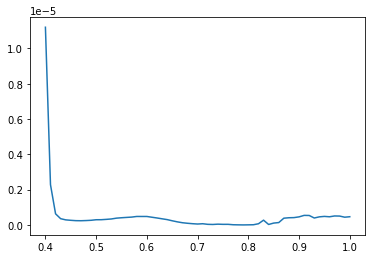

In [51]:
plt.plot(matLambda[:61], matK[:61])

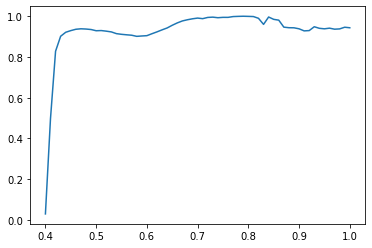

In [52]:
last = 61
thi = 10
t = thi*1.0e3
matT = [np.exp(-4.0*np.pi*t*k/wv) for n,k,wv in zip(matN[:last], matK[:last], matLambda[:last])]
plt.plot(matLambda[:61], matT)

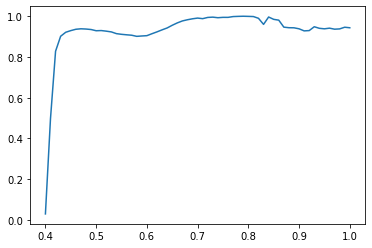

In [53]:
last = 61
thi = 10
t = thi*1.0e3
matT1 = np.exp(-4.0*np.pi*t*matK[:last]/matLambda[:last])
plt.plot(matLambda[:last], matT1)

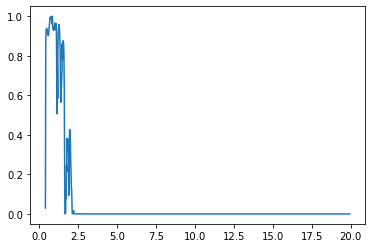

In [54]:
last = 61
thi = 10
t = thi*1.0e3
matT1 = np.exp(-4.0*np.pi*t*matK/matLambda)
plt.plot(matLambda, matT1)

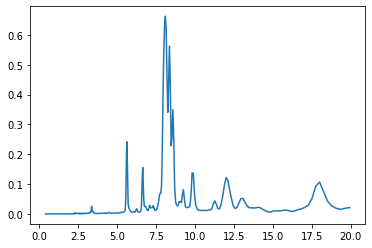

In [55]:
plt.plot(matLambda, matK)

In [56]:
matLambda=[]
matN=[]
matK=[]
materialInputs = materialData["data"].splitlines()
for line in materialInputs:
    parsed=parse("{l:g} {n:g} {k:g}",line)
    matLambda.append(parsed["l"])
    matN.append(parsed["n"])
    matK.append(parsed["k"])


In [57]:
materialInputs[-1]

'19.942 1.62390 2.13E-02'

In [58]:
parsed=parse("{l:g} {n:g} {k:g}",materialInputs[0])

In [59]:
parsed

<Result () {'l': 0.4, 'n': 1.63389, 'k': 1.12e-05}>

In [60]:
parsed["l"]

0.4